../pa_gap/pa_gap10_nve200/pressure
feed    323.848631
gap     -67.524877
perm     74.183538
dtype: float64
feed    169.335926
gap     251.993892
perm    123.466183
dtype: float64
feedvx    9.316647e-07
gapvx     8.214106e-07
permvx    7.908538e-07
feedvy   -1.423550e-06
gapvy     9.958113e-07
permvy   -3.328879e-06
feedvz    9.265680e-07
gapvz     1.141306e-06
permvz    9.377620e-08
dtype: float64
feedvx    0.000013
gapvx     0.000043
permvx    0.000016
feedvy    0.000012
gapvy     0.000043
permvy    0.000016
feedvz    0.000041
gapvz     0.000044
permvz    0.000021
dtype: float64


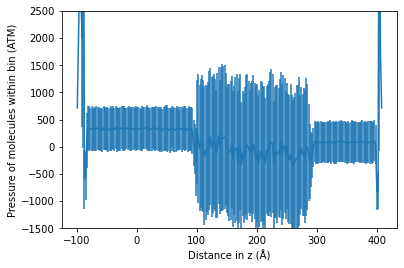

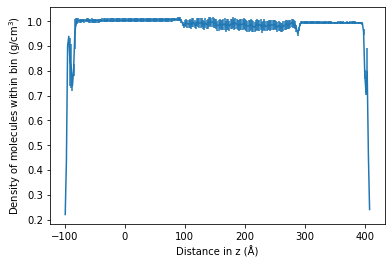

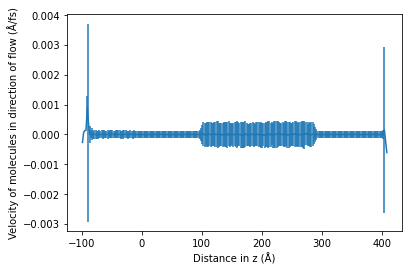

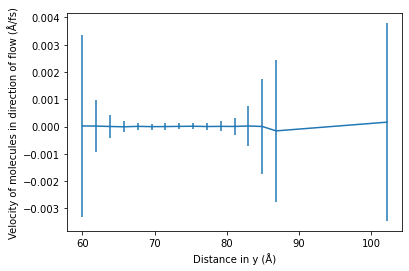

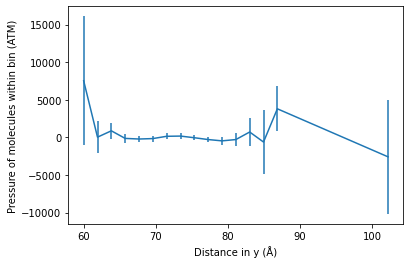

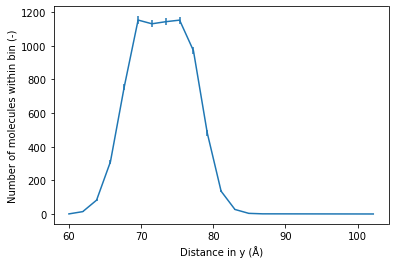

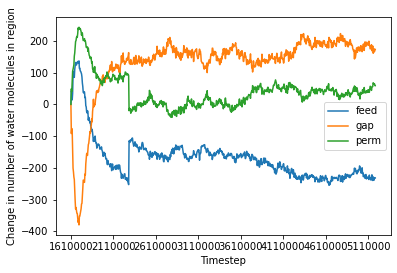

In [1]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)
import numpy as np 
import pandas as pd
import os
import gc
import gzip
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
x_min = 0
x_max = 97.7228
y_min = 0
y_max = 166.129
# x_min = 0
# x_max = 119.544
# y_min = 0
# y_max = 138.038
x_len = x_max - x_min
y_len = y_max - y_min


ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

# Set parent directory containing allsimulations to be analyzed 

gap_sizes = ['10']
pressure_diffs = ['200']

for gap_size in gap_sizes:
    for pressure_diff in pressure_diffs:
        existing_pressure_csv = "./csv/pagap"+gap_size+"_nve"+pressure_diff+"_pressure.csv"
        existing_density_csv = "./csv/pagap"+gap_size+"_nve"+pressure_diff+"_density.csv"
        existing_velocity_csv = "./csv/pagap"+gap_size+"_nve"+pressure_diff+"_vz.csv"

        existingPressureDF = pd.read_csv(existing_pressure_csv,index_col=0,dtype=np.float64)
        existingPressureDF.index = np.round(existingPressureDF.index,3)
        existingDensityDF = pd.read_csv(existing_density_csv,index_col=0,dtype=np.float64)
        existingDensityDF.index = np.round(existingDensityDF.index,3)
        existingvzDF = pd.read_csv(existing_velocity_csv,index_col=0,dtype=np.float64)
        existingvzDF.index = np.round(existingvzDF.index,3)


        existing_pressure_gap_csv = "./csv/pagap"+gap_size+"_nve"+pressure_diff+"_pressure_gap.csv"
        existing_count_gap_csv = "./csv/pagap"+gap_size+"_nve"+pressure_diff+"_count_gap.csv"
        existing_velocity_gap_csv = "./csv/pagap"+gap_size+"_nve"+pressure_diff+"_vz_gap.csv"

        existingPressureGapDF = pd.read_csv(existing_pressure_gap_csv,index_col=0,dtype=np.float64)
        existingPressureGapDF.index = np.round(existingPressureGapDF.index,3)
        existingCountGapDF = pd.read_csv(existing_count_gap_csv,index_col=0,dtype=np.float64)
        existingCountGapDF.index = np.round(existingCountGapDF.index,3)
        existingvzGapDF = pd.read_csv(existing_velocity_gap_csv,index_col=0,dtype=np.float64)
        existingvzGapDF.index = np.round(existingvzGapDF.index,3)

        existing_pressure_res_csv = "./csv/pagap"+gap_size+"_nve"+pressure_diff+"_res_pressures.csv"
        existing_count_res_csv = "./csv/pagap"+gap_size+"_nve"+pressure_diff+"_res_counts.csv"
        existing_velocity_res_csv = "./csv/pagap"+gap_size+"_nve"+pressure_diff+"_res_velocties.csv"

        existingPressureResDF = pd.read_csv(existing_pressure_res_csv,index_col=0)
        existingCountResDF = pd.read_csv(existing_count_res_csv,index_col=0)
        existingvzResDF = pd.read_csv(existing_velocity_res_csv,index_col=0)

        prevMaxtimestep = int(existingPressureDF.columns[-1])

        parentDir = "../pa_gap/pa_gap"+gap_size+"_nve"+pressure_diff+"/"
        allWaterArr = []
        # loop over all simulation folders
        for simDir in sorted_alphanumeric(os.listdir(parentDir)):
            waterArr = []
            # data is expected to be in a folder titled pressure
            dataDir = parentDir+simDir
            print(dataDir)
            for step in sorted_alphanumeric(os.listdir(dataDir)):
                if (int(step.split('.')[1]) > prevMaxtimestep):
                    waterArr.append(dataDir+"/"+step)
            if waterArr:
                allWaterArr.append(waterArr)
            else:
                print("No water array created for: " + dataDir)
#         print(allWaterArr)
        if (allWaterArr):
            pass
        else:
            continue
        i=0
        min_atom_positions = []
        max_atom_positions = []
        # loop through arrays of file names containing data to be analyzed
        for waterArr in allWaterArr:
            timesteps = []
            waterdfs = []
#             print(waterArr[0])  
            for waterFile in waterArr:
                #print(waterFile)
                with gzip.open(waterFile) as f:
                    f.readline().rstrip()
                    timestep = f.readline().rstrip().decode("utf-8") 
                timesteps.append(timestep)
                idf = pd.read_csv(waterFile).iloc[7:,:]
                dfCols = idf.iloc[0,].str.split(' ')[0]
                del dfCols[0:2]
                df = idf.iloc[1:,:]['ITEM: TIMESTEP'].str.split(' ', expand=True)
                df.set_axis(dfCols,axis=1,inplace=True)
                df.reset_index(drop=True, inplace=True)
                df = df.apply(pd.to_numeric)
                min_atom_positions.append(df['z'].min())
                max_atom_positions.append(df['z'].max())
                waterdfs.append(df)
                i+=1
        pressureSeries = []
        densitySeries = []
        countSeries = []
        vxSeries = []
        vySeries = []
        vzSeries = []

        gapPressureSeries = []
        gapDensitySeries = []
        gapCountSeries = []
        gapvxSeries = []
        gapvySeries = []
        gapvzSeries = []

        ## gap10
        # gap_min = 21
        # gap_max = 32

        ## gap46
        gap_min = 60
        gap_max = 106

        gap_len = gap_max - gap_min
        nGapBins = int((gap_len * 0.5) + 1)
        gapBinSize = gap_len/nGapBins

        z_min = -128.921
        z_max = 571.635
        z_len = z_max - z_min

        nBins = int((z_len * 0.5) + 1)
        bin_size = z_len/nBins

        min_timestep = 0
        max_timestep = 800000000

        inlet_z = 105
        outlet_z = 280

        feedPressures = []
        gapPressures = []
        permPressures = []

        feedCount = []
        gapCount = []
        permCount = []

        feedvxs = []
        gapvxs = []
        permvxs = []

        feedvys = []
        gapvys = []
        permvys = []

        feedvzs = []
        gapvzs = []
        permvzs = []

        i=0
        for df in waterdfs:
            if ((int(timesteps[i]) < min_timestep) or (int(timesteps[i]) > max_timestep)):
                i+=1
                continue
            dfMol = pd.DataFrame()

            df['xmass'] = df['mass'] * df['x']
            df['ymass'] = df['mass'] * df['y']
            df['zmass'] = df['mass'] * df['z']

            df['vxmass'] = df['mass'] * df['vx']
            df['vymass'] = df['mass'] * df['vy']
            df['vzmass'] = df['mass'] * df['vz']

            # create per molecule dataframe to analyze at finer scale
            # atoms of a molecule are expected to be consecutive

            dfMol['mass'] = df['mass'].groupby(df.index // 3).sum()
            dfMol['xmass'] = df['xmass'].groupby(df.index // 3).sum()
            dfMol['ymass'] = df['ymass'].groupby(df.index // 3).sum()
            dfMol['zmass'] = df['zmass'].groupby(df.index // 3).sum()
            dfMol['vxmass'] = df['vxmass'].groupby(df.index // 3).sum()
            dfMol['vymass'] = df['vymass'].groupby(df.index // 3).sum()
            dfMol['vzmass'] = df['vzmass'].groupby(df.index // 3).sum()
            dfMol['x'] = dfMol['xmass'] / dfMol['mass']
            dfMol['y'] = dfMol['ymass'] / dfMol['mass']
            dfMol['z'] = dfMol['zmass'] / dfMol['mass']
            dfMol['vx'] = dfMol['vxmass'] / dfMol['mass']
            dfMol['vy'] = dfMol['vymass'] / dfMol['mass']
            dfMol['vz'] = dfMol['vzmass'] / dfMol['mass']
            dfMol['stressvol'] = df['v_peratompress'].groupby(df.index // 3).sum()
            dfMol['vol'] = df['c_peratomvol[1]'].groupby(df.index // 3).sum()
            dfMol['press'] = dfMol['stressvol'] / (-3 * dfMol['vol'])
            dfMol['density'] = (dfMol['mass'] / (x_len * y_len * z_len/nBins)) * ang3_to_cm3 / avo_num
            dfMol['pressbin'] = (dfMol['stressvol'] / (-3 * x_len * y_len * z_len/nBins))
            dfMol['bin'] = pd.cut(dfMol['z'], np.linspace(z_min,z_max,nBins),labels=False)*bin_size + (z_min)
            dfMol['ybin'] = pd.cut(dfMol['y'].loc[(dfMol['z'] > inlet_z) & (dfMol['z'] < outlet_z)], np.linspace(gap_min,gap_max,nGapBins), labels=False) * gapBinSize + gap_min
        #     stepDF_mean = dfMol.loc[(max_atom_positions[i]-dfMol['z'] > 5) & (dfMol['z']-min_atom_positions[i] > 5)].groupby(['bin'], dropna=True).mean()
        #     stepDF_sum = dfMol.loc[(max_atom_positions[i]-dfMol['z'] > 5) & (dfMol['z']-min_atom_positions[i] > 5)].groupby(['bin'], dropna=True).sum()
            stepDF_mean = dfMol.groupby(['bin'], dropna=True).mean()
            stepDF_sum = dfMol.groupby(['bin'], dropna=True).sum()
            stepDF_sum['bin_count'] = dfMol.groupby(['bin'], dropna=True)['bin'].count() 
            gapDF_mean = dfMol.groupby(['ybin'], dropna=True).mean()
            gapDF_sum = dfMol.groupby(['ybin'], dropna=True).sum()
            gapDF_sum['ybin_count'] = dfMol.groupby(['ybin'], dropna=True)['ybin'].count()

            feedPressures.append(dfMol['stressvol'].loc[(dfMol['z'] < inlet_z) & (dfMol['z']-min_atom_positions[i] > 5)].sum() / (-3 * dfMol['vol'].loc[(dfMol['z'] < inlet_z) & (dfMol['z']-min_atom_positions[i] > 5)].sum()))
            gapPressures.append(dfMol['stressvol'].loc[(dfMol['z'] < outlet_z) & (dfMol['z'] > inlet_z)].sum() / (-3 * dfMol['vol'].loc[(dfMol['z'] < outlet_z) & (dfMol['z'] > inlet_z)].sum()))
            permPressures.append(dfMol['stressvol'].loc[(dfMol['z'] > outlet_z) & (max_atom_positions[i]-dfMol['z'] > 5)].sum() / (-3 * dfMol['vol'].loc[(dfMol['z'] > outlet_z) & (max_atom_positions[i]-dfMol['z'] > 5)].sum()))
        #     feedPressures.append(dfMol['stressvol'].loc[(dfMol['z'] < -50)].sum() / (-3 * x_len * y_len * (-50-min_atom_positions[i])))
        #     permPressures.append(dfMol['stressvol'].loc[(dfMol['z'] > 50)].sum() / (-3 * x_len * y_len * (max_atom_positions[i]-50)))

            feedCount.append(dfMol['bin'].loc[(dfMol['z'] < inlet_z)].count())
            gapCount.append(dfMol['bin'].loc[(dfMol['z'] < outlet_z) & (dfMol['z'] > inlet_z)].count())
            permCount.append(dfMol['bin'].loc[(dfMol['z'] > outlet_z)].count())

            feedvxs.append(dfMol['vx'].loc[(dfMol['z'] < inlet_z) & (dfMol['z']-min_atom_positions[i] > 5)].mean())
            gapvxs.append(dfMol['vx'].loc[(dfMol['z'] < outlet_z) & (dfMol['z'] > inlet_z)].mean())
            permvxs.append(dfMol['vx'].loc[(dfMol['z'] > outlet_z) & (max_atom_positions[i]-dfMol['z'] > 5)].mean())

            feedvys.append(dfMol['vy'].loc[(dfMol['z'] < inlet_z) & (dfMol['z']-min_atom_positions[i] > 5)].mean())
            gapvys.append(dfMol['vy'].loc[(dfMol['z'] < outlet_z) & (dfMol['z'] > inlet_z)].mean())
            permvys.append(dfMol['vy'].loc[(dfMol['z'] > outlet_z) & (max_atom_positions[i]-dfMol['z'] > 5)].mean())

            feedvzs.append(dfMol['vz'].loc[(dfMol['z'] < inlet_z) & (dfMol['z']-min_atom_positions[i] > 5)].mean())
            gapvzs.append(dfMol['vz'].loc[(dfMol['z'] < outlet_z) & (dfMol['z'] > inlet_z)].mean())
            permvzs.append(dfMol['vz'].loc[(dfMol['z'] > outlet_z) & (max_atom_positions[i]-dfMol['z'] > 5)].mean())

            vxSeries.append(stepDF_mean['vx'].rename(timesteps[i], axis=1))
            vySeries.append(stepDF_mean['vy'].rename(timesteps[i], axis=1))
            vzSeries.append(stepDF_mean['vz'].rename(timesteps[i], axis=1))

            pressureSeries.append(stepDF_sum['stressvol'].rename(timesteps[i], axis=1)/(-3*stepDF_sum['vol'].rename(timesteps[i], axis=1)))
            densitySeries.append((stepDF_sum['mass'].rename(timesteps[i], axis=1)/(stepDF_sum['vol'].rename(timesteps[i], axis=1)))* ang3_to_cm3 / avo_num)
            countSeries.append(stepDF_sum['bin_count'].rename(timesteps[i], axis=1))

            gapCountSeries.append(gapDF_sum['ybin_count'].rename(timesteps[i], axis=1))
            gapPressureSeries.append(gapDF_sum['stressvol'].rename(timesteps[i], axis=1)/(-3*gapDF_sum['vol'].rename(timesteps[i], axis=1)))
            gapDensitySeries.append((gapDF_sum['mass'].rename(timesteps[i], axis=1)/(gapDF_sum['vol'].rename(timesteps[i], axis=1)))* ang3_to_cm3 / avo_num)
            gapvxSeries.append(gapDF_mean['vx'].rename(timesteps[i], axis=1))
            gapvySeries.append(gapDF_mean['vy'].rename(timesteps[i], axis=1))
            gapvzSeries.append(gapDF_mean['vz'].rename(timesteps[i], axis=1))
            i += 1

        pressureSeriesDF = pd.concat(pressureSeries, axis=1, ignore_index=False)
        densitySeriesDF = pd.concat(densitySeries,axis=1, ignore_index=False)
        countSeriesDF = pd.concat(countSeries, axis=1, ignore_index=False)
        vxSeriesDF = pd.concat(vxSeries, axis=1, ignore_index=False)
        vySeriesDF = pd.concat(vySeries, axis=1, ignore_index=False)                    
        vzSeriesDF = pd.concat(vzSeries, axis=1, ignore_index=False)

        pressureSeriesDF.index = np.round(pressureSeriesDF.index, 3)
        densitySeriesDF.index = np.round(densitySeriesDF.index, 3)
        vzSeriesDF.index = np.round(vzSeriesDF.index, 3)

        gapCountSeriesDF = pd.concat(gapCountSeries, axis=1, ignore_index=False)
        gapPressureSeriesDF = pd.concat(gapPressureSeries, axis=1, ignore_index=False)
        gapDensitySeriesDF = pd.concat(gapDensitySeries,axis=1, ignore_index=False)
        gapvxSeriesDF = pd.concat(gapvxSeries, axis=1, ignore_index=False)
        gapvySeriesDF = pd.concat(gapvySeries, axis=1, ignore_index=False)                    
        gapvzSeriesDF = pd.concat(gapvzSeries, axis=1, ignore_index=False)

        gapPressureSeriesDF.index = np.round(gapPressureSeriesDF.index, 3)
        gapCountSeriesDF.index = np.round(gapCountSeriesDF.index, 3)
        gapvzSeriesDF.index = np.round(gapvzSeriesDF.index, 3)

        resPressures = pd.DataFrame((feedPressures,gapPressures,permPressures),index=('feed','gap','perm'), columns=timesteps)
        resVelocities = pd.DataFrame((feedvxs,gapvxs,permvxs,feedvys,gapvys,permvys,feedvzs,gapvzs,permvzs),index=('feedvx','gapvx','permvx','feedvy','gapvy','permvy','feedvz','gapvz','permvz'),columns=timesteps)
        resCounts = pd.DataFrame((feedCount,gapCount,permCount),index=('feed','gap','perm'), columns=timesteps)
        pressureSeriesDF.index.names = ['Distance in z (Å)']
        densitySeriesDF.index.names = ['Distance in z (Å)']
        vzSeriesDF.index.names = ['Distance in z (Å)']
        gapCountSeriesDF.index.names = ['Distance in y (Å)']
        gapPressureSeriesDF.index.names = ['Distance in y (Å)']
        gapvzSeriesDF.index.names = ['Distance in y (Å)']

        pressureDF = pd.merge(existingPressureDF,pressureSeriesDF,how='outer',left_index=True, right_index=True)
        densityDF = pd.merge(existingDensityDF, densitySeriesDF,how='outer',left_index=True, right_index=True)
        vzDF = pd.merge(existingvzDF,vzSeriesDF,how='outer',left_index=True, right_index=True)

        pressureGapDF = pd.merge(existingPressureGapDF, gapPressureSeriesDF,how='outer',left_index=True, right_index=True)
        countGapDF = pd.merge(existingCountGapDF, gapCountSeriesDF,how='outer',left_index=True, right_index=True)
        vzGapDF = pd.merge(existingvzGapDF,gapvzSeriesDF,how='outer',left_index=True, right_index=True)

        pressureResDF = pd.merge(existingPressureResDF, resPressures, how='outer',left_index=True, right_index=True)
        countResDF = pd.merge(existingCountResDF, resCounts, how='outer',left_index=True, right_index=True)
        vzResDF = pd.merge(existingvzResDF,resVelocities, how='outer',left_index=True, right_index=True)
        
        AVGpressureSeriesDF = pd.DataFrame()
        AVGdensitySeriesDF = pd.DataFrame()
        AVGvxSeriesDF = pd.DataFrame()
        AVGvySeriesDF = pd.DataFrame()
        AVGvzSeriesDF = pd.DataFrame()
        AVGcountSeriesDF = pd.DataFrame()

        AVGgapPressureSeriesDF = pd.DataFrame()
        AVGgapDensitySeriesDF = pd.DataFrame()
        AVGgapCountSeriesDF = pd.DataFrame()

        AVGgapvxSeriesDF = pd.DataFrame()
        AVGgapvySeriesDF = pd.DataFrame()
        AVGgapvzSeriesDF = pd.DataFrame()            

        AVGpressureSeriesDF['mean'] = pressureDF.mean(axis=1)
        AVGpressureSeriesDF['stdev'] = pressureDF.std(axis=1)

        AVGdensitySeriesDF['mean'] = densityDF.mean(axis=1)
        AVGdensitySeriesDF['stdev'] = densityDF.std(axis=1)

        AVGvzSeriesDF['mean'] = vzDF.mean(axis=1)
        AVGvzSeriesDF['stdev'] = vzDF.std(axis=1)

        AVGgapCountSeriesDF['mean'] = countGapDF.mean(axis=1)
        AVGgapCountSeriesDF['stdev'] = countGapDF.std(axis=1)
        AVGgapPressureSeriesDF['mean'] = pressureGapDF.mean(axis=1)
        AVGgapPressureSeriesDF['stdev'] = pressureGapDF.std(axis=1)
        AVGgapvzSeriesDF['mean'] = vzGapDF.mean(axis=1)
        AVGgapvzSeriesDF['stdev'] = vzGapDF.std(axis=1)

        AVGpressureSeriesDF.index.names = ['Distance in z (Å)']
        AVGdensitySeriesDF.index.names = ['Distance in z (Å)']   
        AVGvzSeriesDF.index.names = ['Distance in z (Å)']                      
        AVGgapCountSeriesDF.index.names = ['Distance in y (Å)']
        AVGgapPressureSeriesDF.index.names = ['Distance in y (Å)']
        AVGgapvzSeriesDF.index.names = ['Distance in y (Å)']    
        pressureDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_pressure.csv')
        AVGpressureSeriesDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_pressure_avg.csv')
        AVGpressureSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)', ylim = (-1500,2500))
        plt.savefig('./plots/pagap'+gap_size+'_nve'+pressure_diff+'_pressure_avg.jpg',bbox_inches='tight')

        densityDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_density.csv')
        AVGdensitySeriesDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_density_avg.csv')
        AVGdensitySeriesDF.plot(yerr='stdev',legend=False, ylabel='Density of molecules within bin (g/cm$^3$)')
        plt.savefig('./plots/pagap'+gap_size+'_nve'+pressure_diff+'_density_avg.jpg',bbox_inches='tight')

        vzDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_vz.csv')
        AVGvzSeriesDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_vz_avg.csv')
        AVGvzSeriesDF.plot(yerr='stdev',legend=False, ylabel='Velocity of molecules in direction of flow (Å/fs)')
        plt.savefig('./plots/pagap'+gap_size+'_nve'+pressure_diff+'_vz_avg.jpg',bbox_inches='tight')
        vzGapDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_vz_gap.csv')
        AVGgapvzSeriesDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_vz_gap_avg.csv')
        AVGgapvzSeriesDF.plot(yerr='stdev',legend=False, ylabel='Velocity of molecules in direction of flow (Å/fs)')
        plt.savefig('./plots/pagap'+gap_size+'_nve'+pressure_diff+'_vz_gap_avg.jpg',bbox_inches='tight')

        pressureGapDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_pressure_gap.csv')
        AVGgapPressureSeriesDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_pressure_gap_avg.csv')
        AVGgapPressureSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
        plt.savefig('./plots/pagap'+gap_size+'_nve'+pressure_diff+'_pressure_gap_avg.jpg',bbox_inches='tight')

        countGapDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_count_gap.csv')
        AVGgapCountSeriesDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_count_gap_avg.csv')
        AVGgapCountSeriesDF.plot(yerr='stdev',legend=False, ylabel='Number of molecules within bin (-)')
        plt.savefig('./plots/pagap'+gap_size+'_nve'+pressure_diff+'_count_gap_avg.jpg',bbox_inches='tight')
        pressureResDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_res_pressures.csv')
        print(pressureResDF.mean(axis=1))
        print(pressureResDF.std(axis=1))
        vzResDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_res_velocties.csv')
        print(vzResDF.mean(axis=1))
        print(vzResDF.std(axis=1))
        countResDF.to_csv('./csv/pagap'+gap_size+'_nve'+pressure_diff+'_res_counts.csv')
        initCountResDF = countResDF.iloc[:,0]
        deltaCountResDF = countResDF.sub(initCountResDF,axis=0)

        deltaCountResDF.T.plot(xlabel = 'Timestep', ylabel='Change in number of water molecules in region')
        plt.savefig('./plots/pagap'+gap_size+'_nve'+pressure_diff+'_counts.jpg',bbox_inches='tight')